# Лабораторная работа №9

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Precision, Recall, F1Score, Accuracy
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from random import randint

## Загрузить MNIST

In [84]:
img_rows = img_cols = 28
path_to_data = './'
def load_data(path_to_data, img_rows, img_cols):
    print('Загрузка данных из двоичных файлов...')
    with open(path_to_data + 'images_trn.bin', 'rb') as rb:
        x_trn = np.fromfile(rb, dtype = np.uint8)
    with open(path_to_data + 'labels_trn.bin', 'rb') as rb:
        y_trn = np.fromfile(rb, dtype = np.uint8)
    with open(path_to_data + 'images_tst.bin', 'rb') as rb:
        x_tst = np.fromfile(rb, dtype = np.uint8)
    with open(path_to_data + 'labels_tst.bin', 'rb') as rb:
        y_tst = np.fromfile(rb, dtype = np.uint8)
    x_trn = x_trn.reshape(-1, img_rows * img_cols)
    x_tst = x_tst.reshape(-1, img_rows * img_cols)
    return x_trn, y_trn, x_tst, y_tst
x_trn, y_trn, x_tst, y_tst = load_data(path_to_data, img_rows, img_cols)

Загрузка данных из двоичных файлов...


## Вывести случайные рисунки из обучающего и проверочного множеств (ОМ и ПМ)

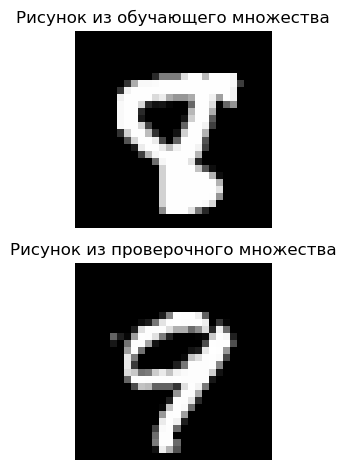

In [87]:
plt.subplot(2, 1, 1)
plt.axis('off')
plt.imshow(x_trn[randint(0, len(x_trn))].reshape(img_rows, img_cols), cmap='gray')
plt.title('Рисунок из обучающего множества')
plt.subplot(2, 1, 2)
plt.axis('off')
plt.imshow(x_tst[randint(0, len(x_tst))].reshape(img_rows, img_cols), cmap='gray')
plt.title('Рисунок из проверочного множества')
plt.tight_layout()
plt.show()

## Нормализация

In [90]:
x_trn = x_trn.astype('float32') / 255
x_tst = x_tst.astype('float32') / 255
y_trn = to_categorical(y_trn, num_classes=10)
y_tst = to_categorical(y_tst, num_classes=10)

## Создать, обучить, сохранить модель НС. Употребить не менее 3-х Dense-слоев

In [93]:
model = Sequential()
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall(), F1Score()])

In [95]:
history = model.fit(x_trn, y_trn, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.9055 - f1_score: 0.3778 - loss: 0.3194 - precision_5: 0.9418 - recall_5: 0.8687
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9729 - f1_score: 0.3857 - loss: 0.0858 - precision_5: 0.9766 - recall_5: 0.9698
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9826 - f1_score: 0.4400 - loss: 0.0577 - precision_5: 0.9843 - recall_5: 0.9807
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9869 - f1_score: 0.4633 - loss: 0.0410 - precision_5: 0.9881 - recall_5: 0.9861
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9896 - f1_score: 0.4392 - loss: 0.0304 - precision_5: 0.9906 - recall_5: 0.9888
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9912 - f1_score: 0.4301 - loss: 0.0272 - precision_5: 0.9918 - recall_5: 0.9906
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9926 - f1_score: 0.4255 - loss: 0.023

In [98]:
model.save('model.keras')

## Вывести историю обучения

История обучения:


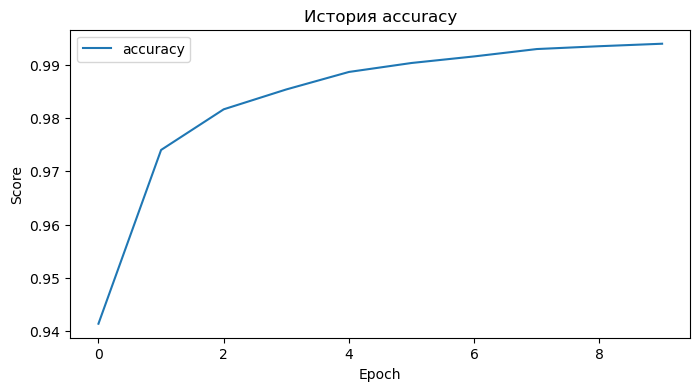

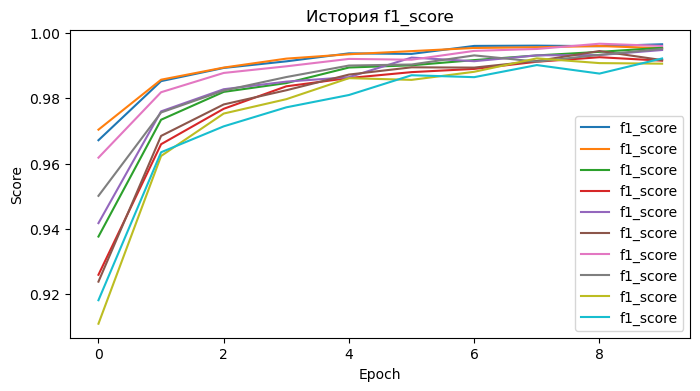

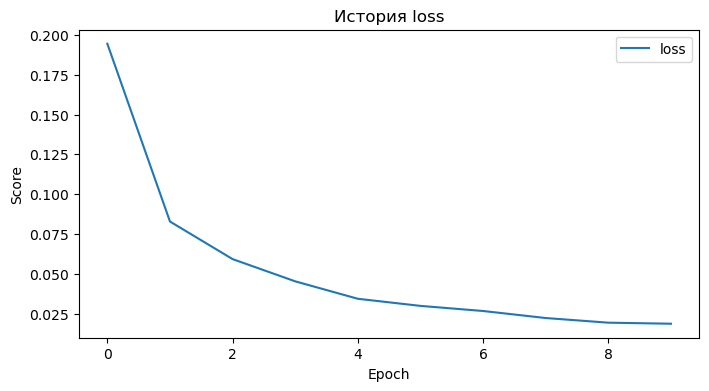

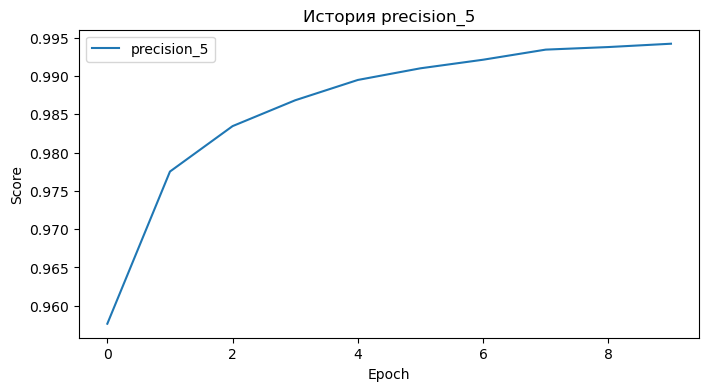

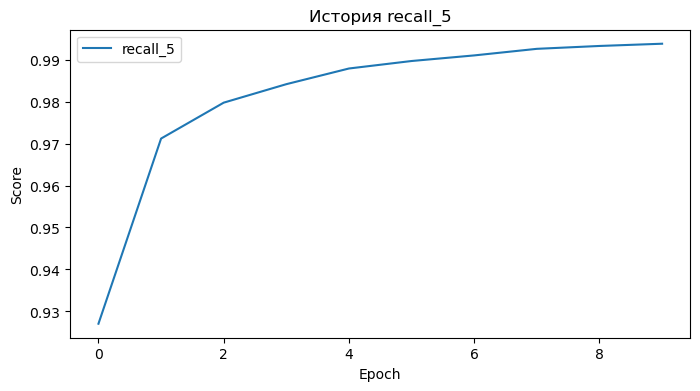

In [115]:
print("История обучения:")
for metric in history.history:
    plt.figure(figsize=(8, 4))
    plt.plot(history.history[metric], label=f'{metric}')
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.title(f'История {metric}')
    plt.legend()
    plt.show() 

## Загрузить и протестировать обученную модель НС

In [122]:
model = load_model('model.keras')

In [124]:
loss, accuracy, precision, recall, f1 = model.evaluate(x_tst, y_tst)
print(f'Test Loss: {loss:.5f}')
print(f'Test Accuracy: {accuracy:.5f}')
print(f'Test Precision: {precision:.5f}')
print(f'Test Recall: {recall:.5f}')
print(f'Test F1Score: {f1}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9752 - f1_score: 0.4274 - loss: 0.1290 - precision_5: 0.9762 - recall_5: 0.9746
Test Loss: 0.11152
Test Accuracy: 0.97860
Test Precision: 0.97927
Test Recall: 0.97800
Test F1Score: [0.97938657 0.9916262  0.97570264 0.97944856 0.97655445 0.9820627
 0.9812499  0.98006797 0.96491224 0.9733266 ]


In [136]:
y_pred_proba = model.predict(x_tst)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_tst, axis=1)
report = classification_report(y_true, y_pred)
print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.99      0.98      1032
           3       0.99      0.97      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.96      0.96       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## Написать свою версию вычисления precision, recall и F1

In [68]:
def get_precision(y_true, y_pred, class_label) -> float:
    tp = sum([1 for i in range(len(y_true)) if y_true[i] == y_pred[i] and y_true[i] == class_label])
    fp = sum([1 for i in range(len(y_true)) if y_true[i] != y_pred[i] and y_pred[i] == class_label])
    return tp / (tp + fp) if tp + fp > 0 else 0

def get_recall(y_true, y_pred, class_label) -> float:
    tp = sum([1 for i in range(len(y_true)) if y_true[i] == y_pred[i] and y_true[i] == class_label])
    fn = sum([1 for i in range(len(y_true)) if y_true[i] != y_pred[i] and y_true[i] == class_label])
    return tp / (tp + fn) if tp + fn > 0 else 0

def f1(y_true, y_pred, class_label) -> float:
    precision = get_precision(y_true, y_pred, class_label)
    recall = get_recall(y_true, y_pred, class_label)
    return 2 * precision * recall / (precision + recall)